In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('sber_data.csv',  sep=',')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


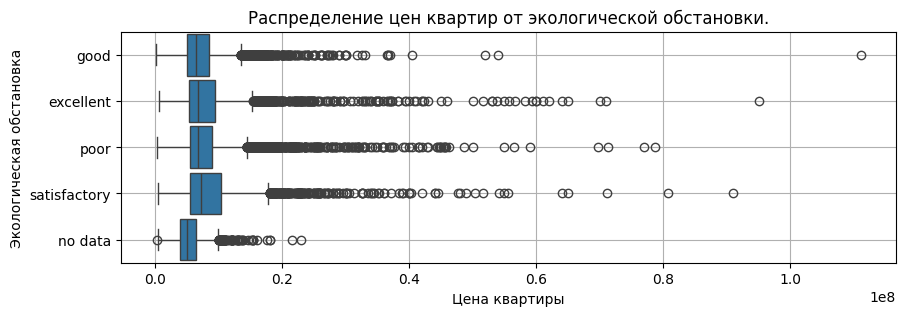

In [2]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение цен квартир от экологической обстановки.');
boxplot.set_xlabel('Цена квартиры')
boxplot.set_ylabel('Экологическая обстановка')
boxplot.grid()

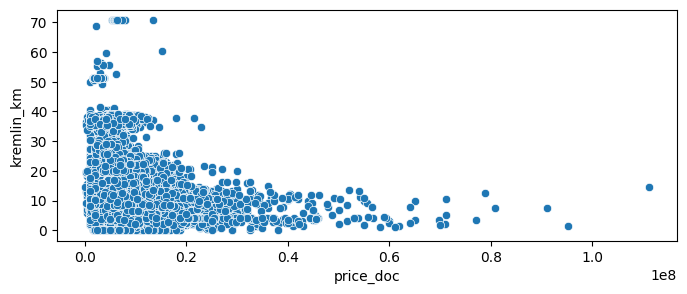

In [3]:
fig = plt.figure(figsize=(8, 3))
scatter = sns.scatterplot(
    data=sber_data,
    y='kremlin_km',
    x='price_doc'
    )

In [4]:
def outliers_z_score_mod(data,feature,log_scale=False,left=3.7, right=3.7):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

df=pd.read_csv('sber_data.csv')
outliers, cleaned = outliers_z_score_mod(data=df, feature='price_doc', log_scale=True)
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')

Число выбросов по методу z-отклонений: 52


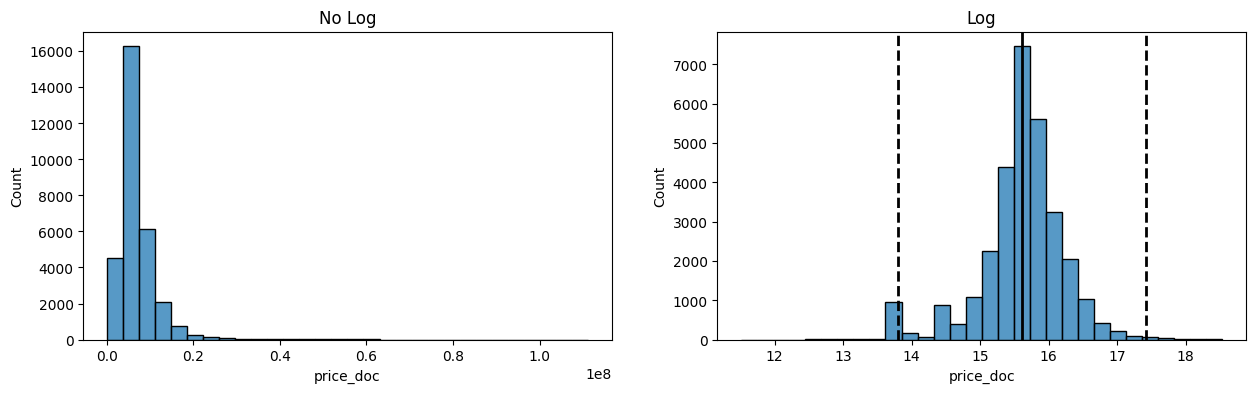

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['price_doc'], bins=30, ax=axes[0])
histplot.set_title('No Log');

#гистограмма в логарифмическом масштабе
price= np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(price , bins=30, ax=axes[1])
histplot.axvline(price.mean(), color='k', lw=2)
histplot.axvline(price.mean()+ 3 * price.std(), color='k', ls='--', lw=2)
histplot.axvline(price.mean()- 3 * price.std(), color='k', ls='--', lw=2)
histplot.set_title('Log');

In [6]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    data = pd.read_csv(data)
    if log_scale == True:
        x= np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(data = 'sber_data.csv', feature = 'price_doc', left = 3, right = 3, log_scale = False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 629
Результирующее число записей: 29842


In [8]:
def nan_detective (cell_being_tested):
    if cell_being_tested == 0:
        return np.nan
    else:
        return cell_being_tested

def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale == True:
        x= np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

def outliers_z_score_mod(data,feature,log_scale=False,left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

diabet_data = pd.read_csv('diabetes_data.csv')
diabet_data = diabet_data.drop_duplicates(subset=diabet_data.columns)

# список неинформативных признаков
low_information_cols = []
for col in diabet_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabet_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabet_data[col].nunique() / diabet_data[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
    if nunique_ratio > 0.95:
        low_information_cols.append(col)

diabet_data = diabet_data.drop(low_information_cols, axis=1)

fill_data = diabet_data.copy()
fill_data['Glucose'] = fill_data['Glucose'].apply(nan_detective)
fill_data['BloodPressure'] = fill_data['BloodPressure'].apply(nan_detective)
fill_data['SkinThickness'] = fill_data['SkinThickness'].apply(nan_detective)
fill_data['Insulin'] = fill_data['Insulin'].apply(nan_detective)
fill_data['BMI'] = fill_data['BMI'].apply(nan_detective)

drop_data = fill_data.copy()

thresh = drop_data.shape[0]*0.7
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data = drop_data.dropna(thresh=len(drop_data.columns) - 2, axis=0)

fill_data = drop_data.copy()
# создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Pregnancies': fill_data['Pregnancies'].median(),
    'Glucose': fill_data['Glucose'].median(),
    'BloodPressure': fill_data['BloodPressure'].median(),
    'SkinThickness': fill_data['SkinThickness'].median(),
    'BMI': fill_data['BMI'].median(),
    'DiabetesPedigreeFunction': fill_data['DiabetesPedigreeFunction'].median(),
    'Age': fill_data['Age'].median(),
    'Outcome': fill_data['Outcome'].mode()[0]
}
# заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)

outliers, cleaned = outliers_iqr_mod(data = fill_data, feature = 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
outliers, cleaned = outliers_z_score_mod(data=fill_data, feature='SkinThickness')
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')

# Считаем разницу выбросов по методу Тьюки между классическим и логнормальным распределением признака DiabetesPedigreeFunction.
outliers, cleaned = outliers_iqr_mod(data = fill_data, feature = 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки при классическом распределении признака: {outliers.shape[0]}')
outliers, cleaned = outliers_iqr_mod(data = fill_data, feature = 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки при логнормальном распределении признака: {outliers.shape[0]}')

display(fill_data)

Число выбросов по методу Тьюки: 87
Число выбросов по методу z-отклонений: 4
Число выбросов по методу Тьюки при классическом распределении признака: 29
Число выбросов по методу Тьюки при логнормальном распределении признака: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,29.0,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,72.0,29.0,42.4,0.205,29,1
